In [11]:
import pandas as pd
import numpy  as np
import matplotlib
import pandas
from matplotlib import pylab as plt
import re
import nltk
import sklearn
import sklearn.feature_extraction.text as sk

In [12]:
def wm2df(wm, feat_names):
    # create an index for each row
    doc_names = ['Doc{:d}'.format(idx) for idx, _ in enumerate(wm)]
    df = pd.DataFrame(data=wm.toarray(), index=doc_names,
                      columns=feat_names)
    return(df)

In [13]:
output =  [['4fd399788eb7c8105d8d5685', ['News', 'Obama, Barack',
                                       'Volcker, Paul A', 'Banks and Banking', 'Economic Recovery Advisory Board',
                                       'United States']], 
         ['504a8c451c22dfde670c42ab', ['Helmand Province (Afghanistan)'
                                       , 'Taliban', 'United States Marine Corps', 'Afghanistan War (2001- )'
                                       , 'United States Defense and Military Forces', 'Afghanistan']],
         ['4a8c451c22dfde670c42a',['Afghanistan','Taliban','Banks and Banking']]]

In [14]:
output

[['4fd399788eb7c8105d8d5685',
  ['News',
   'Obama, Barack',
   'Volcker, Paul A',
   'Banks and Banking',
   'Economic Recovery Advisory Board',
   'United States']],
 ['504a8c451c22dfde670c42ab',
  ['Helmand Province (Afghanistan)',
   'Taliban',
   'United States Marine Corps',
   'Afghanistan War (2001- )',
   'United States Defense and Military Forces',
   'Afghanistan']],
 ['4a8c451c22dfde670c42a', ['Afghanistan', 'Taliban', 'Banks and Banking']]]

In [15]:
import collections
def get_word_to_count_dict(corpus):
    """
    Return a list in the following format: [{keyword: count}]
    """
    c = collections.Counter()
    for doc in corpus:
        keywords = doc[1]
        for keyword in keywords:
            c[keyword] += 1
    return [[key, c[key]] for key in c.keys()]

In [16]:
count_list=get_word_to_count_dict(output)

In [17]:
count_list

[['News', 1],
 ['Obama, Barack', 1],
 ['Volcker, Paul A', 1],
 ['Banks and Banking', 2],
 ['Economic Recovery Advisory Board', 1],
 ['United States', 1],
 ['Helmand Province (Afghanistan)', 1],
 ['Taliban', 2],
 ['United States Marine Corps', 1],
 ['Afghanistan War (2001- )', 1],
 ['United States Defense and Military Forces', 1],
 ['Afghanistan', 2]]

In [18]:
sorted_list=sorted(count_list,key=lambda x:-x[1])

In [24]:
sorted_list

[['Banks and Banking', 2],
 ['Taliban', 2],
 ['Afghanistan', 2],
 ['News', 1],
 ['Obama, Barack', 1],
 ['Volcker, Paul A', 1],
 ['Economic Recovery Advisory Board', 1],
 ['United States', 1],
 ['Helmand Province (Afghanistan)', 1],
 ['United States Marine Corps', 1],
 ['Afghanistan War (2001- )', 1],
 ['United States Defense and Military Forces', 1]]

In [25]:
kdf=pd.DataFrame(sorted_list, columns=['Keyword', 'Count'])
kdf

,Keyword,Count
0,Banks and Banking,2
1,Taliban,2
2,Afghanistan,2
3,News,1
4,"Obama, Barack",1
5,"Volcker, Paul A",1
6,Economic Recovery Advisory Board,1
7,United States,1
8,Helmand Province (Afghanistan),1
9,United States Marine Corps,1


In [195]:
# data = (pd.DataFrame(sorted_list))
# data.sort_values(by=[1])
# data.drop([0],inplace=True,axis=1)
# datat=data.transpose()
# datat.columns=col
# datat

In [83]:
# # instantiate the vectorizer object
# #cvec = sk.CountVectorizer(lowercase=False, token_pattern='(?u)\\b\\w\\w+\\b')
# cvec = sk.CountVectorizer(lowercase=False, token_pattern="(?u)\\b[\\w-]+\\b")
# # convert the documents into a document-term matrix
# wm = cvec.fit_transform(flattened_list)

# # retrieve the terms found in the corpora
# tokens = cvec.get_feature_names()

# # create a dataframe from the matrix
# table=wm2df(wm, tokens)
# table

In [84]:
# word_freq=table.sum(axis = 0, skipna = True)
# type(word_freq)

# f_word = pd.DataFrame([word_freq])
# f_word=f_word.transpose()
# f_word = f_word.sort_values(0,ascending=False)

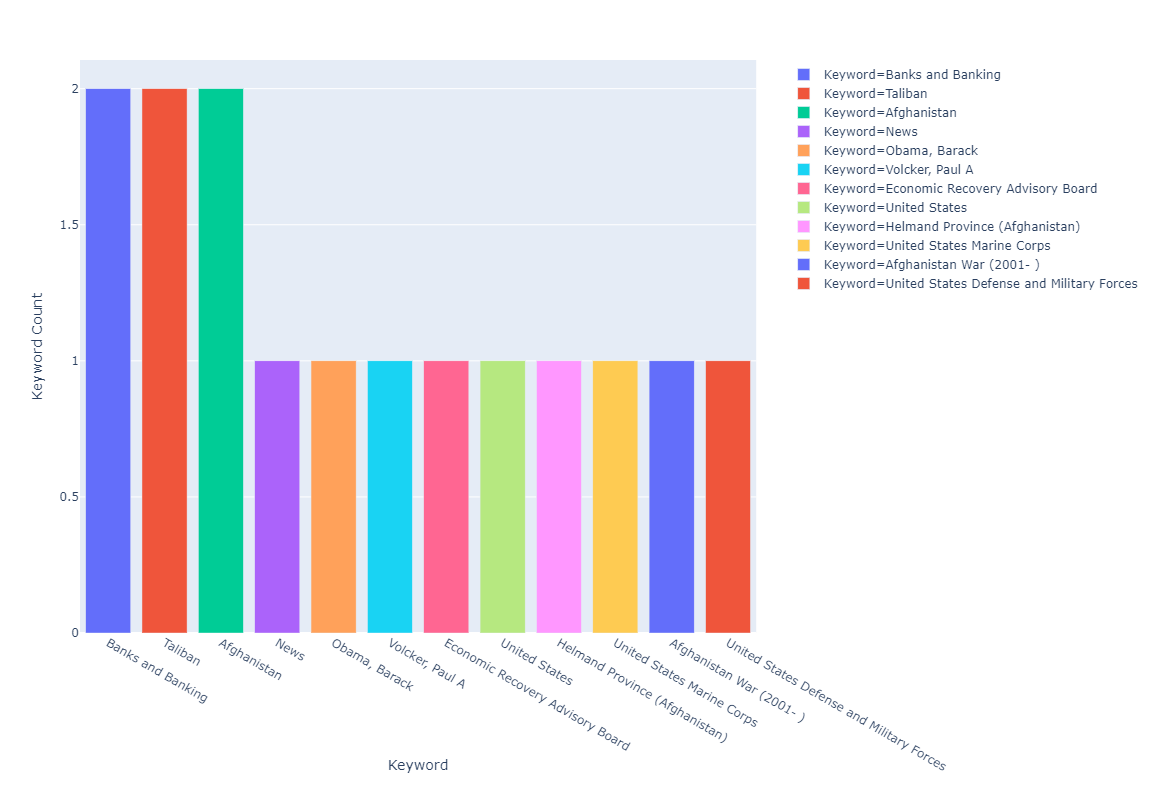

In [44]:
fig = px.bar(kdf, x='Keyword', y='Count',
             hover_data=['Count'], color='Keyword', height=800,
            labels={'Count':'Keyword Count'}
            )
fig.show()

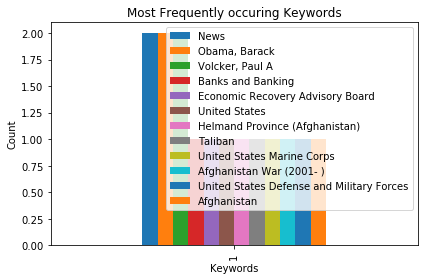

In [176]:
#word_freq.value_counts()[:20].plot(kind='bar')
datat.plot.bar()
plt.xlabel('Keywords')
plt.ylabel('Count')
plt.title('Most Frequently occuring Keywords')
plt.tight_layout()